## Part 1: Tasks

These tasks focus on fundamental concepts from this week's module.

### Task 1: Random Forest Regression Basics

**Dataset:** `Task-Datasets/task1_random_forest_data.csv`

**Objective:** Build a Random Forest regression model to predict Target based on Feature values.

**Requirements:**
1. Load the dataset and explore its structure
2. Split the data into training (80%) and testing (20%) sets with `random_state=42`
3. Create a Random Forest Regressor with:
   - `n_estimators=100`
   - `max_depth=10`
   - `random_state=42`
4. Train the model and make predictions on the test set
5. Calculate and print the R² score
6. Display feature importance in descending order

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
# Load and explore the dataset
task1_data = pd.read_csv('Task-Datasets/task1_random_forest_data.csv')

task1_data.head()

,Feature,Target
0,1,150
1,2,200
2,3,350
3,4,600
4,5,1000


In [5]:
task1_data.info()
task1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Feature  20 non-null     int64
 1   Target   20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


,Feature,Target
count,20.00000,20.000000
mean,10.50000,2120.000000
std,5.91608,1369.729132
min,1.00000,150.000000
25%,5.75000,1150.000000
50%,10.50000,1950.000000
75%,15.25000,3375.000000
max,20.00000,4200.000000


### Findings: 
No missing values, No encoding needed as all data is numerical.

In [7]:
# Split the data into features and target variable
X = task1_data[['Feature']]
Y = task1_data['Target']

In [8]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=42)

In [11]:
# Create and train the Random Forest model
RF_model = RandomForestRegressor( n_estimators=100, 
                                 max_depth=10, 
                                 random_state=42 )

#Train the model and make predictions 
RF_model.fit(X_train, Y_train) 
Y_pred = RF_model.predict(X_test)

In [13]:
# Make predictions and calculate R² score
R2 = r2_score (Y_test, Y_pred)
print (f'R2 Score = {R2}' )

R2 Score = 0.878024820806881


In [17]:
# Display feature importance
feature_importances = pd.DataFrame({ "Feature": X.columns, 
                                    "Importance": RF_model.feature_importances_ 
                                    }).sort_values(by="Importance", ascending=False) 
print("\nFeature Importances:") 
print(feature_importances)


Feature Importances:
   Feature  Importance
0  Feature         1.0


This result is 1.0 because we have only one feature in this dataset. 

---

### Task 2: Model Performance Evaluation

**Dataset:** `Task-Datasets/task2_model_evaluation_data.csv`

**Objective:** Evaluate a regression model using multiple performance metrics.

**Requirements:**
1. Load the dataset and split into features (Experience, Training_Hours, Previous_Projects) and target (Salary)
2. Split into training (70%) and testing (30%) sets with `random_state=42`
3. Train a Random Forest Regressor with `n_estimators=50, random_state=42`
4. Make predictions on the test set
5. Calculate and display ALL of the following metrics:
   - R² Score
   - Adjusted R² Score (use formula: 1 - (1-R²) * (n-1)/(n-k-1))
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
6. Create a visualization comparing actual vs predicted values

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
# Load the dataset
task2_data = pd.read_csv('Task-Datasets/task2_model_evaluation_data.csv')

task2_data.info()
task2_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Experience         51 non-null     int64
 1   Training_Hours     51 non-null     int64
 2   Previous_Projects  51 non-null     int64
 3   Salary             51 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


,Experience,Training_Hours,Previous_Projects,Salary
count,51.000000,51.000000,51.000000,51.000000
mean,7.294118,109.470588,8.725490,84.392157
std,4.258141,58.314442,5.513904,31.228883
min,0.000000,15.000000,0.000000,32.000000
25%,4.000000,59.000000,4.000000,59.000000
50%,7.000000,108.000000,9.000000,85.000000
75%,11.000000,162.500000,13.000000,111.000000
max,15.000000,200.000000,19.000000,140.000000


In [ ]:
# Split into features and target
X = task2_data.drop ('Salary', axis =1 )
Y = task2_data['Salary']

In [47]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size= 0.3, 
                                                    random_state=42)
#Check
print(X_train.shape)
print(Y_train.shape)

(35, 3)
(35,)


In [58]:
# Train the model
RF_model = RandomForestRegressor(n_estimators=50, random_state=42)
RF_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [49]:
# Make predictions
Y_pred = RF_model.predict(X_test)


In [59]:
# Calculate all evaluation metrics
r2 = r2_score(Y_test, Y_pred) 
# Adjusted R² formula 
n = X_test.shape[0] # number of observations 
k = X_test.shape[1] # number of predictors 

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1) 
mae = mean_absolute_error(Y_test, Y_pred) 
mse = mean_squared_error(Y_test, Y_pred) 
rmse = np.sqrt(mse) 

#Results
print(f"R² Score: {r2:.4f}") 
print(f"Adjusted R² Score: {adj_r2:.4f}") 
print(f"Mean Absolute Error (MAE): {mae:.4f}") 
print(f"Mean Squared Error (MSE): {mse:.4f}") 
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.9912
Adjusted R² Score: 0.9890
Mean Absolute Error (MAE): 2.1513
Mean Squared Error (MSE): 6.6671
Root Mean Squared Error (RMSE): 2.5821


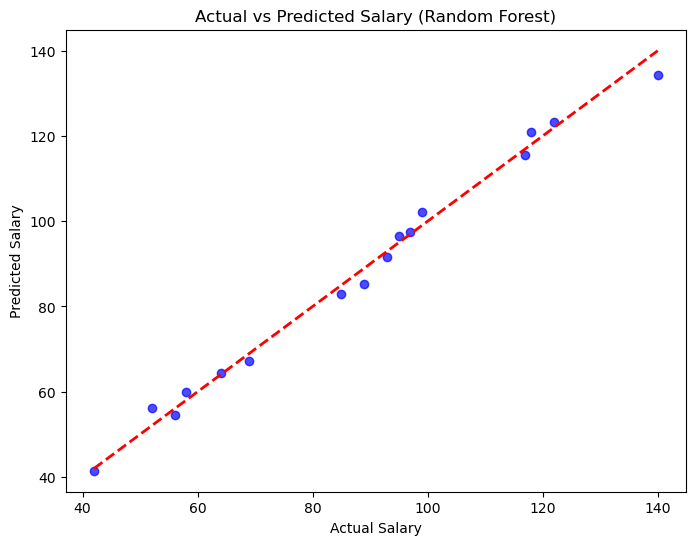

In [55]:
# Visualize actual vs predicted values
plt.figure(figsize=(8,6)) 
plt.scatter(Y_test, Y_pred, color="blue", alpha=0.7) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "r--", lw=2) 
plt.xlabel("Actual Salary") 
plt.ylabel("Predicted Salary") 
plt.title("Actual vs Predicted Salary (Random Forest)") 
plt.show()

---

### Task 3: Binary Classification with Logistic Regression

**Dataset:** `Task-Datasets/task3_classification_data.csv`

**Objective:** Build a logistic regression model to classify emails as spam or not spam.

**Requirements:**
1. Load the dataset and explore its structure
2. Split into features (all columns except 'is_spam') and target ('is_spam')
3. Split into training (80%) and testing (20%) sets with `random_state=42`
4. Create and train a Logistic Regression model with `random_state=42, max_iter=1000`
5. Make predictions on the test set
6. Calculate and display:
   - Confusion Matrix
   - Accuracy Score
   - Precision Score
   - Recall Score
   - F1 Score
7. Interpret the results: Which metric is most important for spam detection and why?

In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [71]:
# Load and explore the dataset
task3_data = pd.read_csv('Task-Datasets/task3_classification_data.csv')

task3_data.info()
task3_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   email_id           100 non-null    object 
 1   word_count         100 non-null    int64  
 2   link_count         100 non-null    int64  
 3   contains_urgent    100 non-null    int64  
 4   sender_reputation  100 non-null    float64
 5   has_attachment     100 non-null    int64  
 6   capital_ratio      100 non-null    float64
 7   exclamation_count  100 non-null    int64  
 8   is_spam            100 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.2+ KB


,word_count,link_count,contains_urgent,sender_reputation,has_attachment,capital_ratio,exclamation_count,is_spam
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,87.030000,4.430000,0.500000,0.519300,0.420000,0.233000,5.600000,0.500000
std,36.595649,4.472712,0.502519,0.379253,0.496045,0.182466,5.724306,0.502519
min,38.000000,0.000000,0.000000,0.060000,0.000000,0.040000,0.000000,0.000000
25%,54.750000,0.000000,0.000000,0.150000,0.000000,0.050000,0.000000,0.000000
50%,80.500000,3.000000,0.500000,0.540000,0.000000,0.205000,3.500000,0.500000
75%,113.500000,8.000000,1.000000,0.892500,1.000000,0.402500,10.000000,1.000000
max,168.000000,14.000000,1.000000,0.950000,1.000000,0.520000,17.000000,1.000000


In [74]:
# Split into features and target
X = task3_data.drop(['is_spam', 'email_id'], axis=1)
Y = task3_data['is_spam'].values

In [75]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.2, 
                                                    random_state= 42 )

In [76]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [78]:
# Make predictions
Y_pred = log_reg.predict(X_test)

In [ ]:
# Calculate and display classification metrics
# When Y_test are the true labels and Y_pred are the predicted labels

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Precision, Recall, F1
precision = precision_score(Y_test, Y_pred, average='binary')  
recall = recall_score(Y_test, Y_pred, average='binary')
f1 = f1_score(Y_test, Y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
 [[12  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



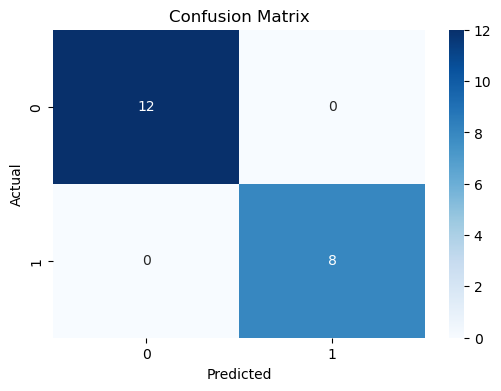

In [81]:
#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Interpretation:**
Based on our classification report, all metrics (precision, recall, F1‑score, and accuracy) are perfect (1.00). This means the model correctly identified every spam and non‑spam email in the test set.

For spam detection specifically, recall is the most critical metric because it measures how many actual spam emails were successfully flagged. Missing spam (false negatives) is riskier than occasionally misclassifying a legitimate email. However, since both precision and recall are 1.00 here, the model is performing flawlessly: it catches all spam while not mislabeling any legitimate emails.

---

## Part 2: Assignments

These assignments require deeper analysis and comparison of multiple models.

### Assignment 1: Comparative Regression Analysis

**Dataset:** `Assignment-Dataset/assignment1_house_prices.csv`

**Objective:** Compare multiple regression models for house price prediction.

**Requirements:**
1. Load the dataset and perform exploratory data analysis:
   - Display basic statistics
   - Check for missing values
   - Visualize the distribution of house prices
   - Create a correlation heatmap
2. Prepare the data:
   - Split into features and target (price)
   - Split into training (80%) and testing (20%) sets with `random_state=42`
3. Train and evaluate THREE models:
   - Linear Regression
   - Decision Tree Regressor (`max_depth=10, random_state=42`)
   - Random Forest Regressor (`n_estimators=100, max_depth=10, random_state=42`)
4. For each model, calculate:
   - R² Score
   - Adjusted R² Score
   - MAE
   - RMSE
5. Create a comparison table or visualization showing all metrics for all models
6. Provide a written analysis:
   - Which model performed best?
   - Why might Random Forest outperform or underperform compared to simpler models?
   - Which features are most important for price prediction? (use Random Forest feature importance)

In [ ]:
# Import necessary libraries


In [ ]:
# Load the dataset


In [ ]:
# Exploratory Data Analysis


In [ ]:
# Data preparation


In [ ]:
# Model 1: Linear Regression


In [ ]:
# Model 2: Decision Tree Regressor


In [ ]:
# Model 3: Random Forest Regressor


In [ ]:
# Compare all models


In [ ]:
# Feature importance analysis


**Analysis:**

*Write your comparative analysis here*

---

### Assignment 2: Binary Classification with Model Tuning

**Dataset:** `Assignment-Dataset/assignment2_marketing_campaign.csv`

**Objective:** Build and optimize a classification model to predict customer response to marketing campaign.

**Requirements:**
1. Load and explore the dataset:
   - Check class distribution (Responded vs not Responded)
   - Identify any class imbalance
   - Visualize key features by response status
2. Prepare the data:
   - Split into features and target (Responded)
   - Split into training (75%) and testing (25%) sets with `random_state=42`
3. Train TWO Logistic Regression models:
   - Model A: Default parameters with `random_state=42, max_iter=1000`
   - Model B: With class balancing `class_weight='balanced', random_state=42, max_iter=1000`
4. For each model, calculate and display:
   - Confusion Matrix
   - Accuracy, Precision, Recall, F1-Score
   - ROC Curve and AUC Score
5. Compare the two models:
   - Which performs better overall?
   - How does class balancing affect the results?
   - What is the trade-off between precision and recall?
6. Make business recommendations:
   - Which model would you deploy and why?
   - What threshold would you use for classifying responses?

In [ ]:
# Import necessary libraries


In [ ]:
# Load and explore the dataset


In [ ]:
# Check class distribution


In [ ]:
# Data preparation


In [ ]:
# Model A: Default Logistic Regression


In [ ]:
# Evaluate Model A


In [ ]:
# Model B: Balanced Logistic Regression


In [ ]:
# Evaluate Model B


In [ ]:
# ROC Curves comparison


**Comparative Analysis:**

*Write your comparison here*

**Business Recommendations:**

*Write your recommendations here*

---

### Assignment 3: Multi-Class Classification

**Dataset:** `Assignment-Dataset/assignment3_credit_risk.csv`

**Objective:** Build a multi-class classification model to predict credit risk levels.

**Requirements:**
1. Load and explore the dataset:
   - Examine the distribution of risk levels (Low, Medium, High)
   - Analyze key features across different risk categories
   - Check for any data quality issues
2. Prepare the data:
   - Split into features and target (Risk_Category)
   - Split into training (70%) and testing (30%) sets with `random_state=42`
3. Train THREE classification models:
   - Logistic Regression (multi-class: `multi_class='ovr', random_state=42, max_iter=1000`)
   - Decision Tree Classifier (`max_depth=10, random_state=42`)
   - Random Forest Classifier (`n_estimators=100, max_depth=10, random_state=42`)
4. For each model, evaluate using:
   - Confusion Matrix (use heatmap visualization)
   - Classification Report (precision, recall, f1-score for each class)
   - Overall Accuracy
5. Analyze model performance:
   - Which risk level is easiest/hardest to predict?
   - Which model performs best for each risk category?
   - Are there any systematic misclassifications?
6. Feature importance:
   - Display the top 5 most important features from Random Forest
   - Explain how these features relate to credit risk

In [ ]:
# Import necessary libraries


In [ ]:
# Load and explore the dataset


In [ ]:
# Analyze risk level distribution


In [ ]:
# Data preparation


In [ ]:
# Model 1: Logistic Regression


In [ ]:
# Evaluate Logistic Regression


In [ ]:
# Model 2: Decision Tree Classifier


In [ ]:
# Evaluate Decision Tree


In [ ]:
# Model 3: Random Forest Classifier


In [ ]:
# Evaluate Random Forest


In [ ]:
# Feature importance analysis


**Performance Analysis:**

*Write your analysis here*

**Feature Importance Interpretation:**

*Explain how the top features relate to credit risk*

---

## Part 3: Assessment Project

This is a comprehensive project that combines all the concepts learned this week.

### Assessment: Customer Churn Prediction - End-to-End ML Project

**Dataset:** `Assessment-Dataset/customer_churn_prediction.csv`

**Business Context:**
You are a data scientist at a telecommunications company. The company is losing customers to competitors and wants to identify which customers are at risk of churning (leaving the service). Your task is to build a comprehensive machine learning solution to:
1. Predict which customers will churn
2. Identify the key factors driving churn
3. Provide actionable insights to the retention team

**Dataset Description:**
The dataset contains 500 customer records with 19 features including:
- Demographics: Age, Gender
- Account info: Tenure, Contract_Type, Payment_Method
- Service usage: Monthly_Charges, Total_Charges, Internet_Service, Phone_Service
- Support metrics: Support_Calls, Customer_Satisfaction_Score
- Service features: Streaming_TV, Streaming_Movies, Online_Security, Tech_Support
- Target: Churn (0 = active, 1 = churned)

---

### Phase 1: Data Understanding & Exploration

Write a summary of your findings from EDA (3-5 key insights)

**EDA Summary:**

*Write your key findings here*

1. 
2. 
3. 
4. 
5. 

---

### Phase 2: Data Preprocessing

---

### Phase 3: Model Building & Evaluation

---

### Phase 4: Feature Importance & Insights

---

### Phase 5: Business Recommendations

**Step 5.1:** Model selection justification:

Based on your analysis, answer the following:

1. **Which model would you recommend for deployment and why?**
   - Consider accuracy, interpretability, and business needs
   - Think about the cost of false positives vs false negatives

2. **What probability threshold would you use for classification?**
   - Default is 0.5, but should it be adjusted?
   - Consider the business impact of missing a churner vs false alarms

3. **How confident are you in the model's predictions?**
   - What are the limitations?
   - What additional data might improve performance?

**Model Selection:**

*Write your answer here*

**Step 5.2:** Actionable recommendations for the retention team:

Based on your feature importance analysis and model insights, provide 5-7 specific, actionable recommendations:

Example format:
- **Recommendation 1:** Target customers with month-to-month contracts for conversion to annual contracts
  - *Insight:* 60% of churners had month-to-month contracts
  - *Action:* Offer 10% discount for switching to annual contract
  - *Expected Impact:* Reduce churn by 15-20% in this segment

**Business Recommendations:**

1. **Recommendation 1:**
   - Insight:
   - Action:
   - Expected Impact:

2. **Recommendation 2:**
   - Insight:
   - Action:
   - Expected Impact:

3. **Recommendation 3:**
   - Insight:
   - Action:
   - Expected Impact:

4. **Recommendation 4:**
   - Insight:
   - Action:
   - Expected Impact:

5. **Recommendation 5:**
   - Insight:
   - Action:
   - Expected Impact:

**Step 5.3:** Implementation plan:

Outline how this model would be deployed in production:
1. How often should the model be retrained?
2. What monitoring metrics would you track?
3. How would you measure the business impact?
4. What are the next steps for model improvement?

**Implementation Plan:**

1. **Retraining Schedule:**
   
2. **Monitoring Metrics:**
   
3. **Business Impact Measurement:**
   
4. **Next Steps:**